<a href="https://colab.research.google.com/github/seunghokimS/DACON-Agricultural-product-price-prediction-/blob/main/%EC%A0%9C%EC%A3%BC%EB%8F%84_%EB%86%8D%EC%82%B0%EB%AC%BC_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import holidays
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
import matplotlib.dates as mdates
from matplotlib import container
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import levene
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.multicomp import MultiComparison
from sklearn.decomposition import PCA

Mounted at /content/drive
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
df_trade = pd.read_csv("/content/drive/MyDrive/공모전(Dacon)/제주도 농산물/international_trade.csv")
df_train = pd.read_csv("/content/drive/MyDrive/공모전(Dacon)/제주도 농산물/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/공모전(Dacon)/제주도 농산물/test.csv")

In [ ]:
names = ['감귤' , '꽃양배추와 브로콜리(broccoli)', '순무' , '당근', '양배추' ]

df_trade = df_trade[df_trade['품목명'].isin(names)]
df_trade['품목명'] = df_trade['품목명'].replace({'꽃양배추와 브로콜리(broccoli)': '브로콜리', '순무': '무'})
# df_trade['기간'] = pd.to_datetime(df_trade['기간'])
# df_trade.set_index('기간', inplace = True)

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()
df_train['holiday'] = df_train['timestamp'].apply(lambda x : 'Y' if x in kr_holidays else 'N')
# df_test['holiday'] = df_test['timestamp'].apply(lambda x : 'Y' if x in kr_holidays else 'N')
# df_test['timestamp(M)'] = df_test['timestamp'].str[:7]
df_trade.rename(columns = {'기간':'timestamp(M)','품목명':'item'}, inplace=True)

<ipython-input-3-a5d9688f0eb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trade['품목명'] = df_trade['품목명'].replace({'꽃양배추와 브로콜리(broccoli)': '브로콜리', '순무': '무'})


In [ ]:
df_train['timestamp(M)'] = df_train['timestamp'].str[:7]
df_train['item'] = df_train['item'].replace({'TG': '감귤', 'BC': '브로콜리', 'RD': '무', 'CR': '당근', 'CB': '양배추'})

In [ ]:
mg_df = pd.merge(df_train, df_trade, on = ['timestamp(M)','item'], how = 'inner')

In [ ]:
mg_df = mg_df.drop(columns=['ID','timestamp','timestamp(M)','holiday'])

<ipython-input-7-a20d1b5ff283>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = mg_df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


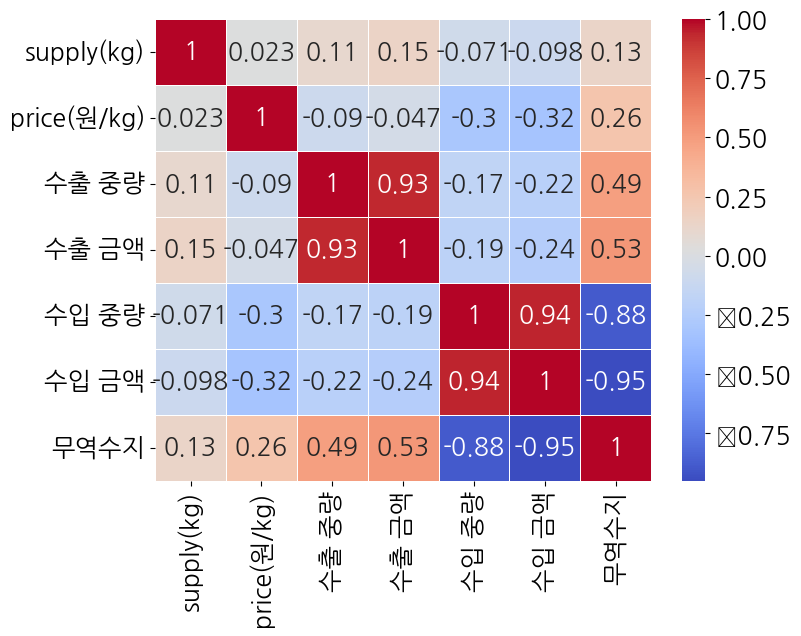

In [ ]:
corr_matrix = mg_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True , cmap = 'coolwarm', linewidths=.5)
plt.show()

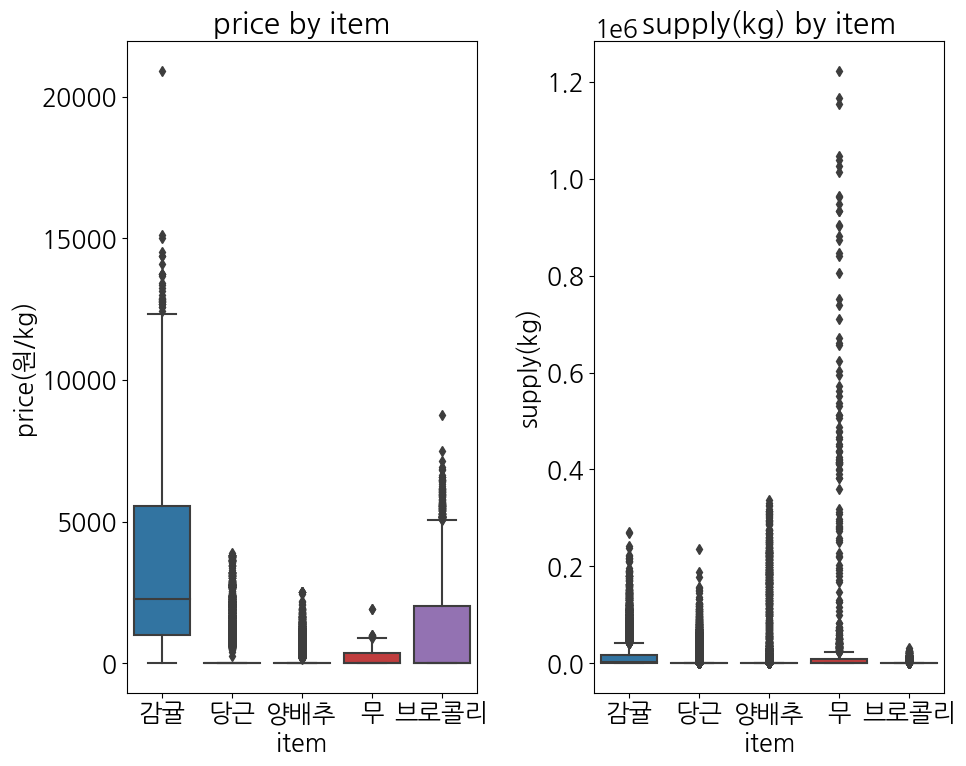

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.boxplot(data = mg_df, x='item', y='price(원/kg)')
plt.title('price by item')

plt.subplot(1,2,2)
sns.boxplot(data = mg_df, x='item', y='supply(kg)')
plt.title('supply(kg) by item')

plt.tight_layout()
plt.show()

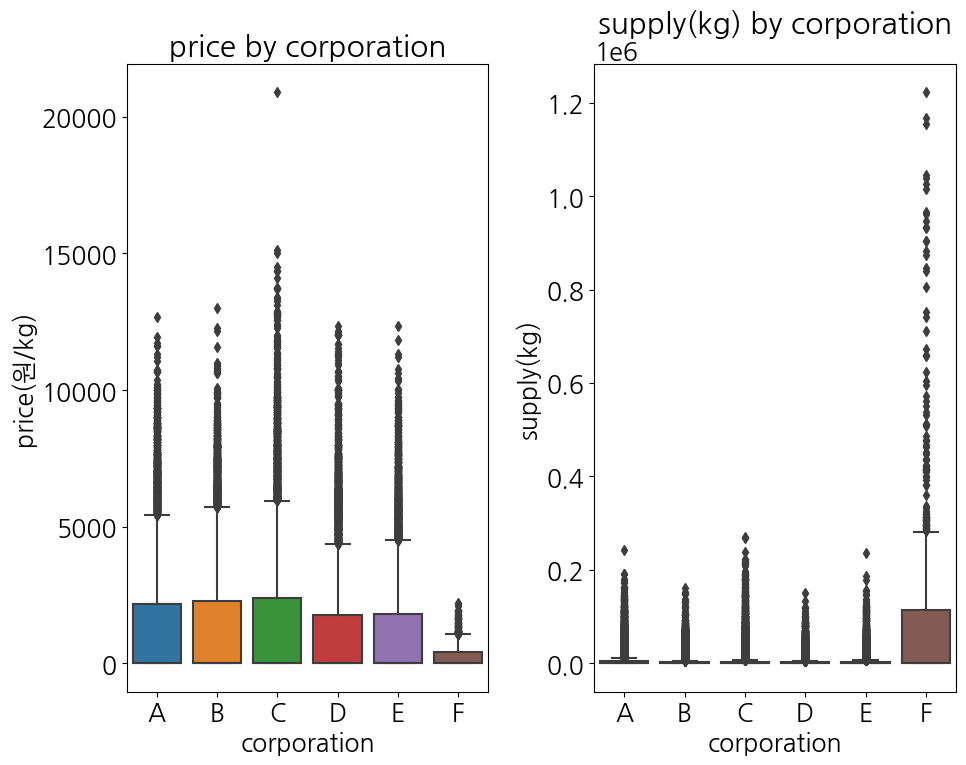

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.boxplot(data = mg_df, x='corporation', y='price(원/kg)')
plt.title('price by corporation')

plt.subplot(1,2,2)
sns.boxplot(data = mg_df, x='corporation', y='supply(kg)')
plt.title('supply(kg) by corporation')

plt.tight_layout()
plt.show()

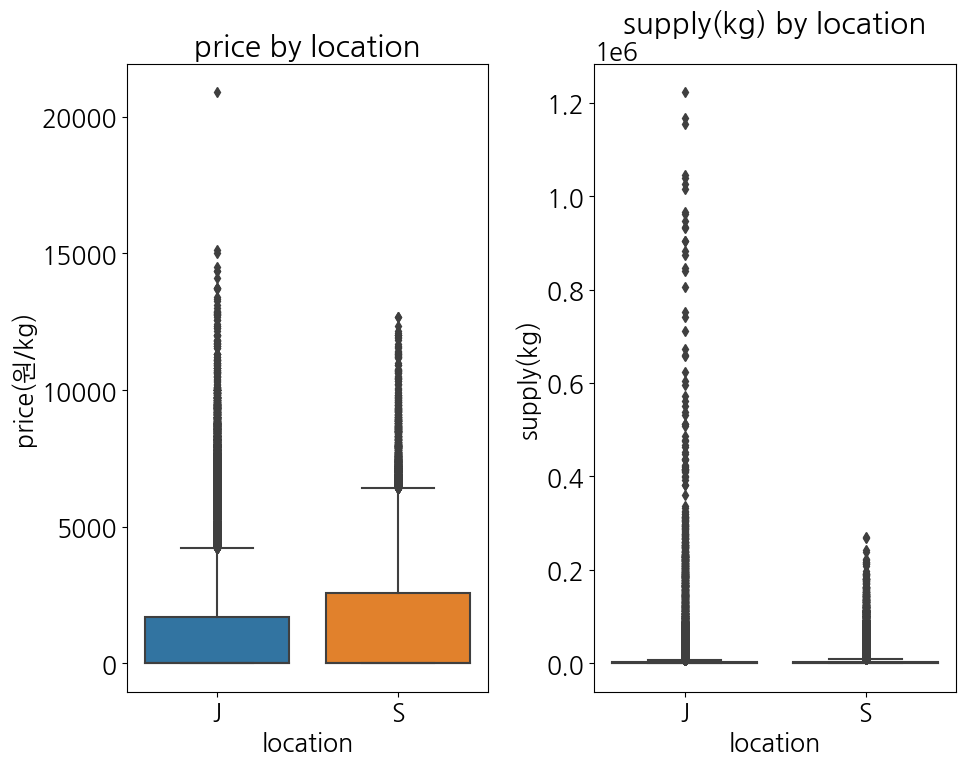

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
sns.boxplot(data = mg_df, x='location', y='price(원/kg)')
plt.title('price by location')

plt.subplot(1,2,2)
sns.boxplot(data = mg_df, x='location', y='supply(kg)')
plt.title('supply(kg) by location')

plt.tight_layout()
plt.show()

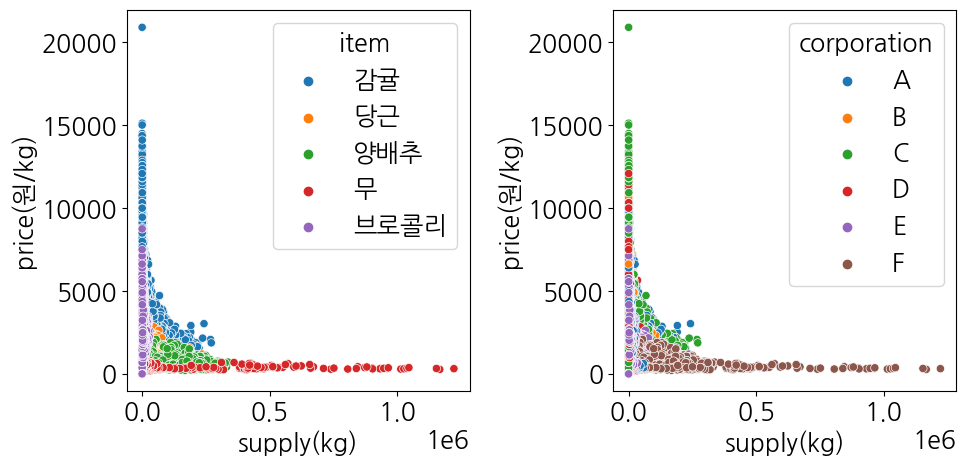

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(data = mg_df, x='supply(kg)', y='price(원/kg)', hue='item')

plt.subplot(1,2,2)
sns.scatterplot(data = mg_df, x='supply(kg)', y='price(원/kg)', hue='corporation')

plt.tight_layout()
plt.show()

In [ ]:
mg_df.head()

,item,corporation,location,supply(kg),price(원/kg),수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,감귤,A,J,0.0,0.0,58368,172,0,0,172
1,감귤,A,J,0.0,0.0,58368,172,0,0,172
2,감귤,A,J,60601.0,1728.0,58368,172,0,0,172
3,감귤,A,J,25000.0,1408.0,58368,172,0,0,172
4,감귤,A,J,32352.0,1250.0,58368,172,0,0,172


In [ ]:
tg = mg_df[mg_df['item'].str.contains('감귤')]
bc = mg_df[mg_df['item'].str.contains('브로콜리')]
rd = mg_df[mg_df['item'].str.contains('무')]
cr = mg_df[mg_df['item'].str.contains('당근')]
cb = mg_df[mg_df['item'].str.contains('양배추')]

In [ ]:
mg_df.columns

Index(['item', 'corporation', 'location', 'supply(kg)', 'price(원/kg)', '수출 중량',
       '수출 금액', '수입 중량', '수입 금액', '무역수지'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scale_cols = ['supply(kg)', 'price(원/kg)','수출 중량','수출 금액','수입 중량','수입 금액','무역수지']
encode_cols = ['item', 'corporation', 'location']

scaler = StandardScaler()
encoder = LabelEncoder()

data_frames = [(tg, '감귤'), (bc, '브로콜리'), (rd, '무'), (cr, '당근'), (cb, '양배추')]

scalers = {}

for df, item_name in data_frames:
    df_scaled = scaler.fit_transform(df[scale_cols])
    df[scale_cols] = df_scaled

    # 스케일러 저장
    scalers[item_name] = scaler

    # 인코딩
    for col in encode_cols:
        df[col] = encoder.fit_transform(df[col])


# 예측 후 역스케일링 예시
# 예를 들어, '감귤' 데이터에 대한 가격 예측 후 역스케일링을 수행한다고 가정
# predicted_price = ... # 모델에서 예측된 가격
# original_scale_price = scalers['감귤'].inverse_transform(predicted_price.reshape(-1, 1))


<ipython-input-15-486298343358>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scale_cols] = df_scaled
<ipython-input-15-486298343358>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
<ipython-input-15-486298343358>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
for df, item_name in data_frames:
    # 원래의 스케일러를 사용하여 스케일된 데이터를 원래의 값으로 되돌림
    df[scale_cols] = scalers[item_name].inverse_transform(df[scale_cols])

    # 되돌린 데이터를 저장
    scalers[item_name] = df.copy()

<ipython-input-16-b4111cbe3cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scale_cols] = scalers[item_name].inverse_transform(df[scale_cols])
<ipython-input-16-b4111cbe3cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scale_cols] = scalers[item_name].inverse_transform(df[scale_cols])
<ipython-input-16-b4111cbe3cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
scale_cols = ['supply(kg)', 'price(원/kg)', '수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지']
encode_cols = ['item', 'corporation', 'location']

# 데이터 프레임을 저장할 리스트 생성
data_frames = [tg, bc, rd, cr, cb]  # tg, bc, rd, cr, cb는 각각 다른 데이터 프레임을 나타냅니다.

# 스케일러와 인코더 객체를 저장할 딕셔너리 생성
scalers = {}
encoders = {}

# 스케일링 및 인코딩 수행
for df in data_frames:
    item_name = df['item'].iloc[0]  # 각 데이터 프레임의 'item' 열 값
    scaler = StandardScaler()
    encoder = LabelEncoder()

    # 스케일링 수행 및 스케일러 객체 저장
    df[scale_cols] = scaler.fit_transform(df[scale_cols])
    scalers[item_name] = scaler

    # 인코딩 수행 및 인코더 객체 저장
    for col in encode_cols:
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder

# 스케일된 데이터와 인코딩된 데이터를 원래의 값으로 되돌림
# for df in data_frames:
#     item_name = df['item'].iloc[0]  # 각 데이터 프레임의 'item' 열 값

#     # 스케일된 값을 원래의 값으로 되돌림
#     df[scale_cols] = scalers[item_name].inverse_transform(df[scale_cols])

#     # 인코딩된 값을 원래의 값으로 되돌림
#     for col in encode_cols:
#         df[col] = encoders[col].inverse_transform(df[col])

# 결과 확인
for df in data_frames:
    print(df)

       item  corporation  location  supply(kg)  price(원/kg)     수출 중량  \
0         0            0         0   -0.557981    -1.131780 -0.366217   
1         0            0         0   -0.557981    -1.131780 -0.366217   
2         0            0         0    1.825207    -0.516179 -0.366217   
3         0            0         0    0.425166    -0.630179 -0.366217   
4         0            0         0    0.714290    -0.686466 -0.366217   
...     ...          ...       ...         ...          ...       ...   
15195     0            4         1    0.438113    -0.053765 -0.427437   
15196     0            4         1    0.633594    -0.082265 -0.427437   
15197     0            4         1   -0.557981    -1.131780 -0.427437   
15198     0            4         1    0.393863     0.085885 -0.427437   
15199     0            4         1   -0.023660    -0.012796 -0.427437   

          수출 금액     수입 중량     수입 금액      무역수지  
0     -0.276662 -0.394672 -0.385262 -0.260156  
1     -0.276662 -0.394672 -

<ipython-input-17-552bac7df77e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[scale_cols] = scaler.fit_transform(df[scale_cols])
<ipython-input-17-552bac7df77e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
<ipython-input-17-552bac7df77e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

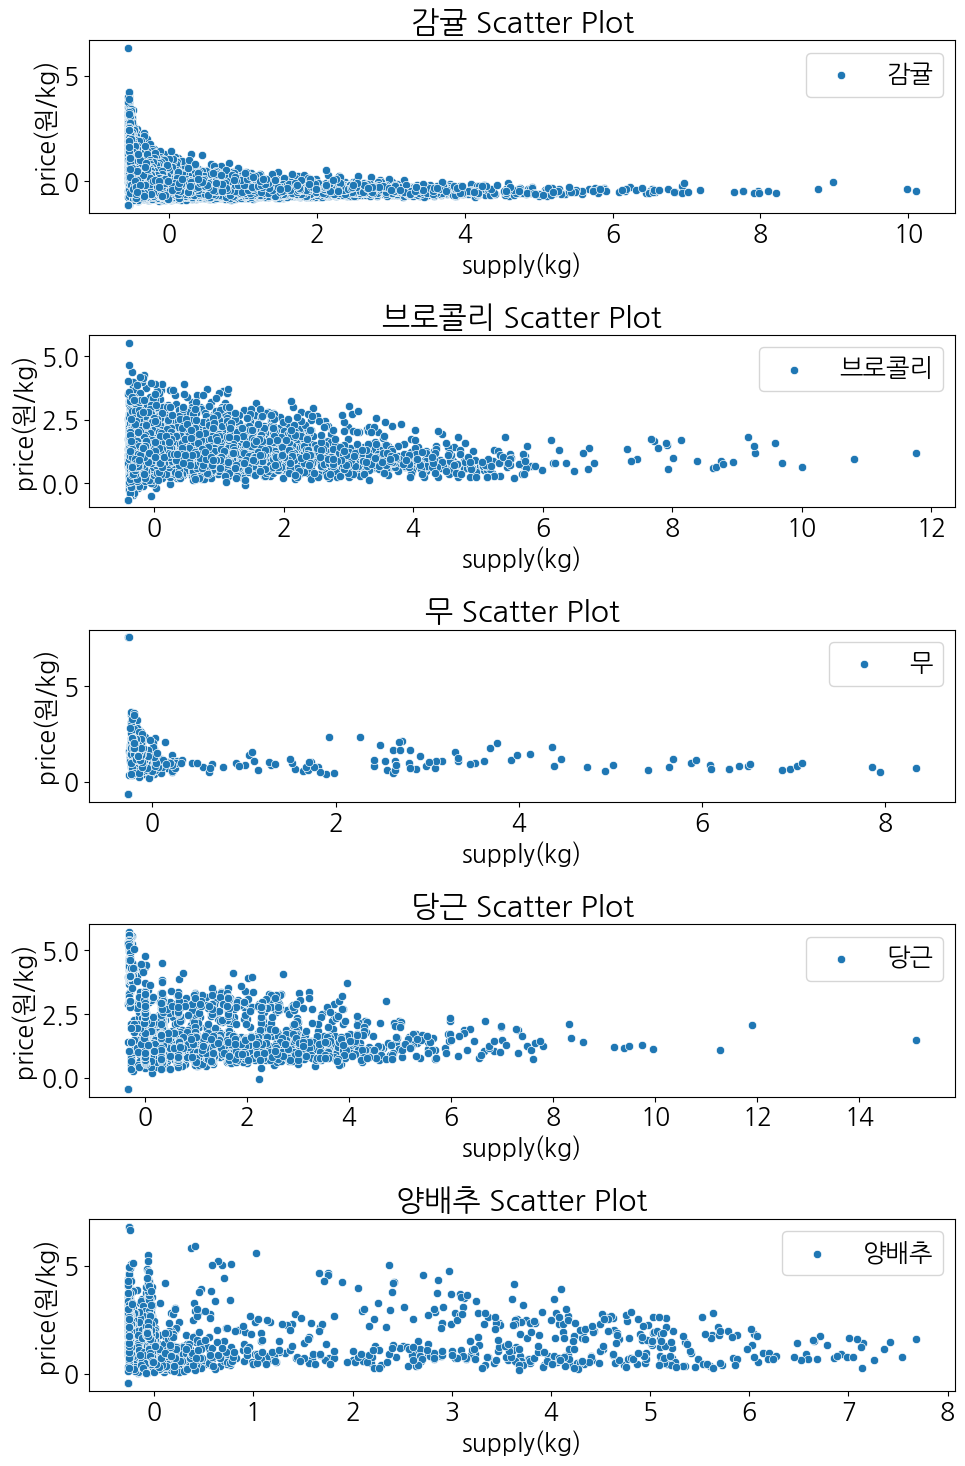

In [ ]:
list = [(tg, '감귤'), (bc, '브로콜리'), (rd, '무'), (cr, '당근'), (cb, '양배추')]

fig, axes = plt.subplots(5,1, figsize=(10,15))
for i , (df,label) in enumerate(list):
    sns.scatterplot(data = df , x = 'supply(kg)', y = 'price(원/kg)', ax = axes[i], label = label)
    axes[i].set_title(f'{label} Scatter Plot')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 감귤: p-value = 0.0


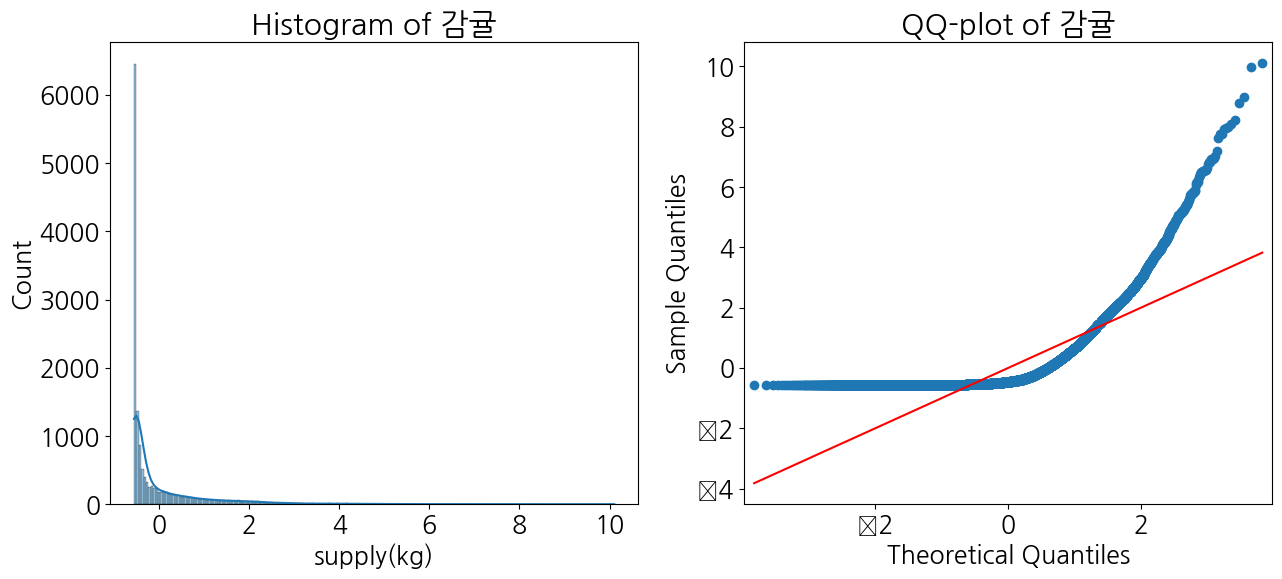

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 감귤: p-value = 0.0


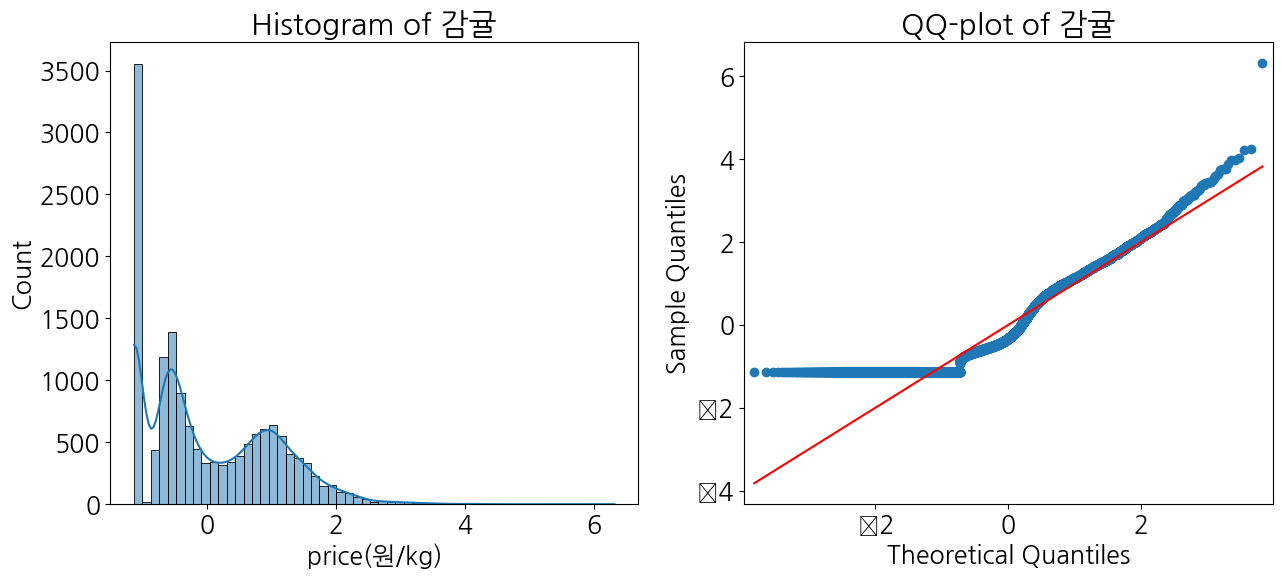

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 브로콜리: p-value = 0.0


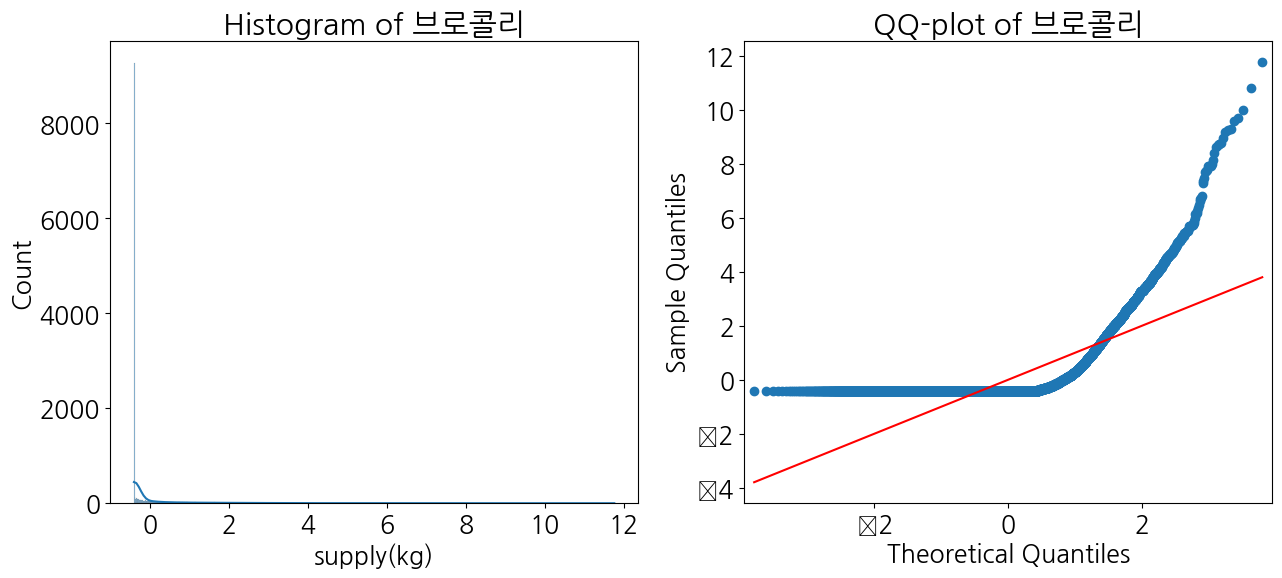

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 브로콜리: p-value = 0.0


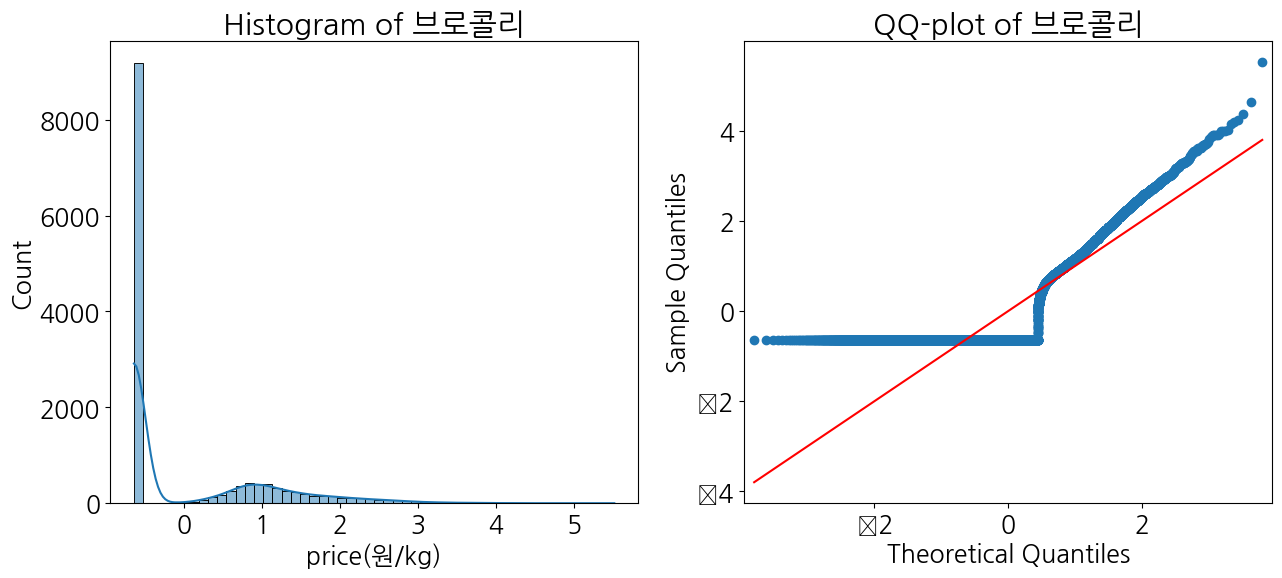

Shapiro-Wilk test for 무: p-value = 0.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


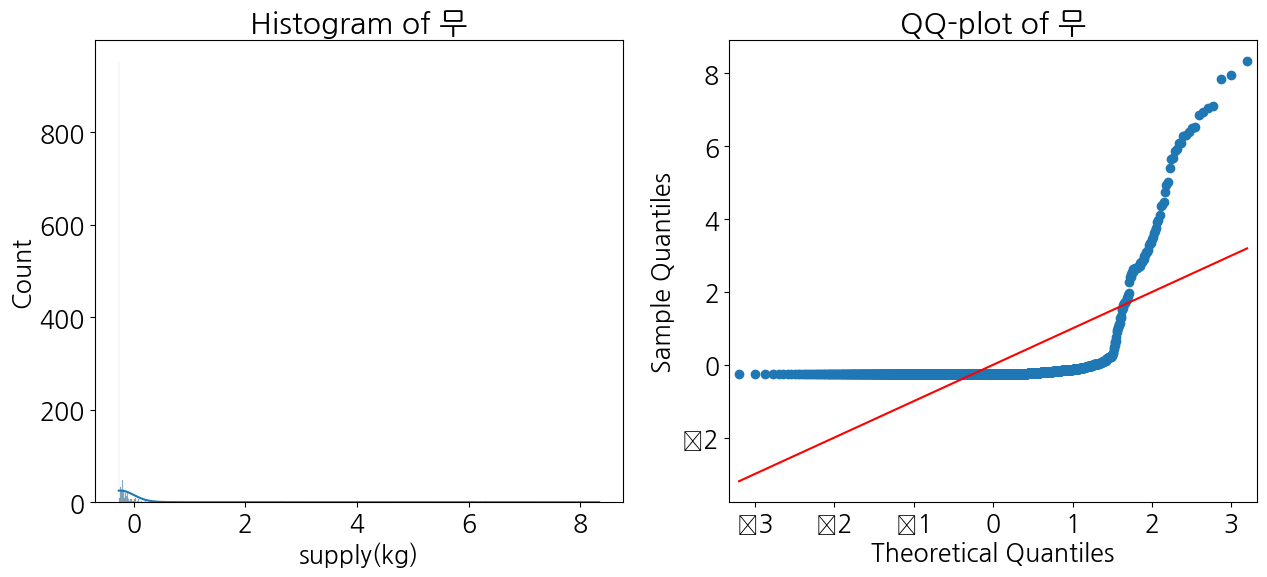

Shapiro-Wilk test for 무: p-value = 1.401298464324817e-45


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


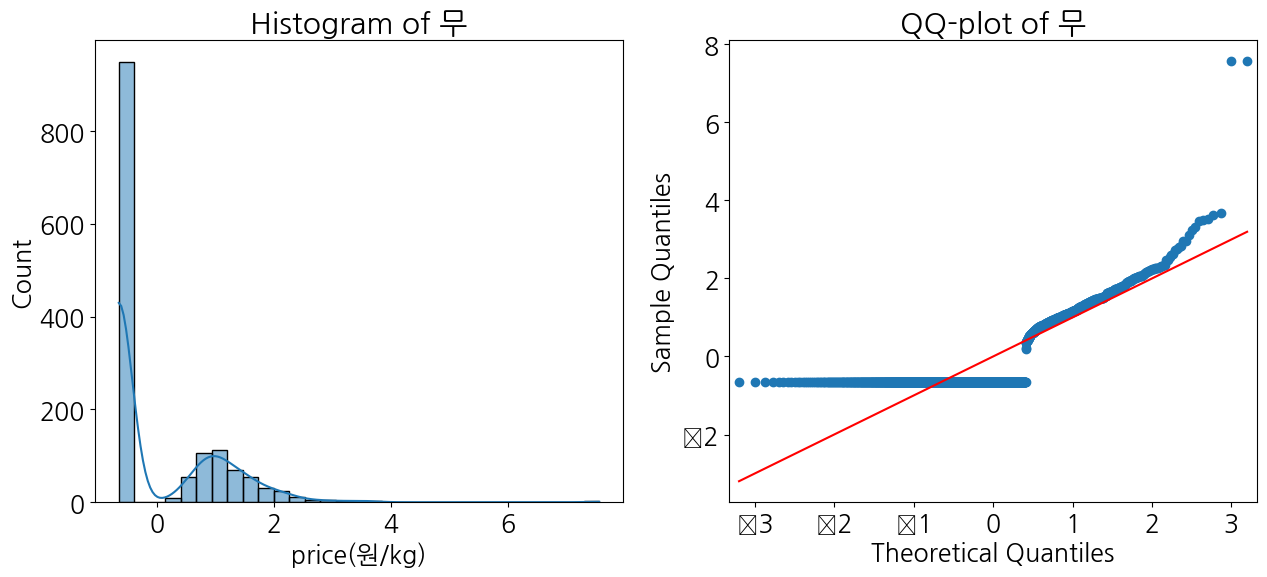

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 당근: p-value = 0.0


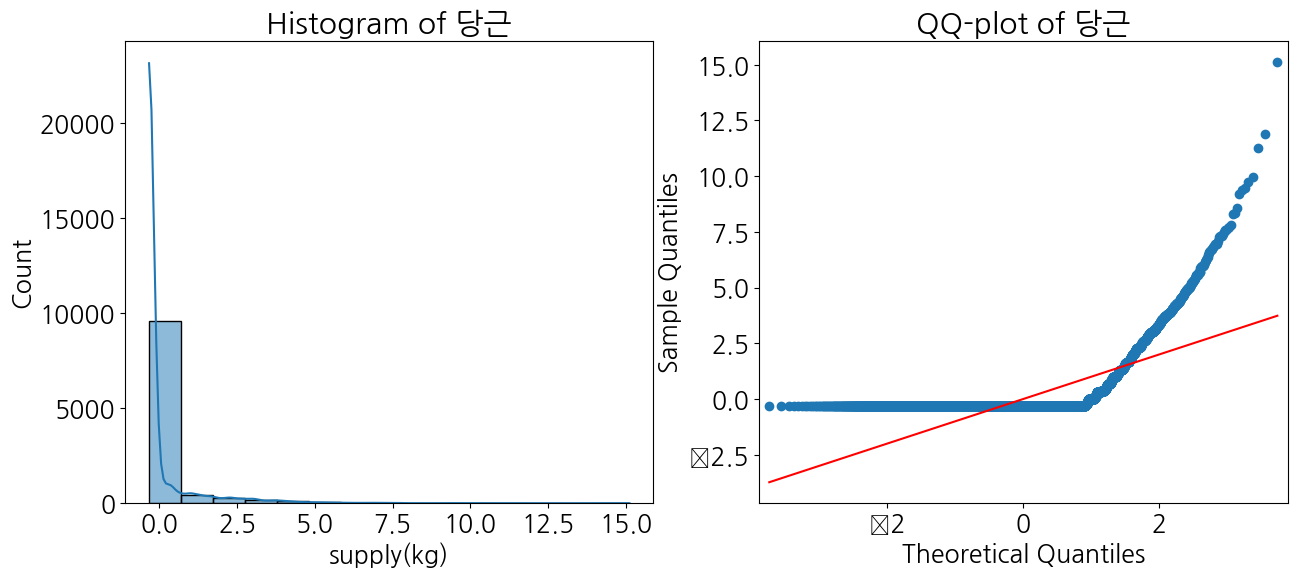

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 당근: p-value = 0.0


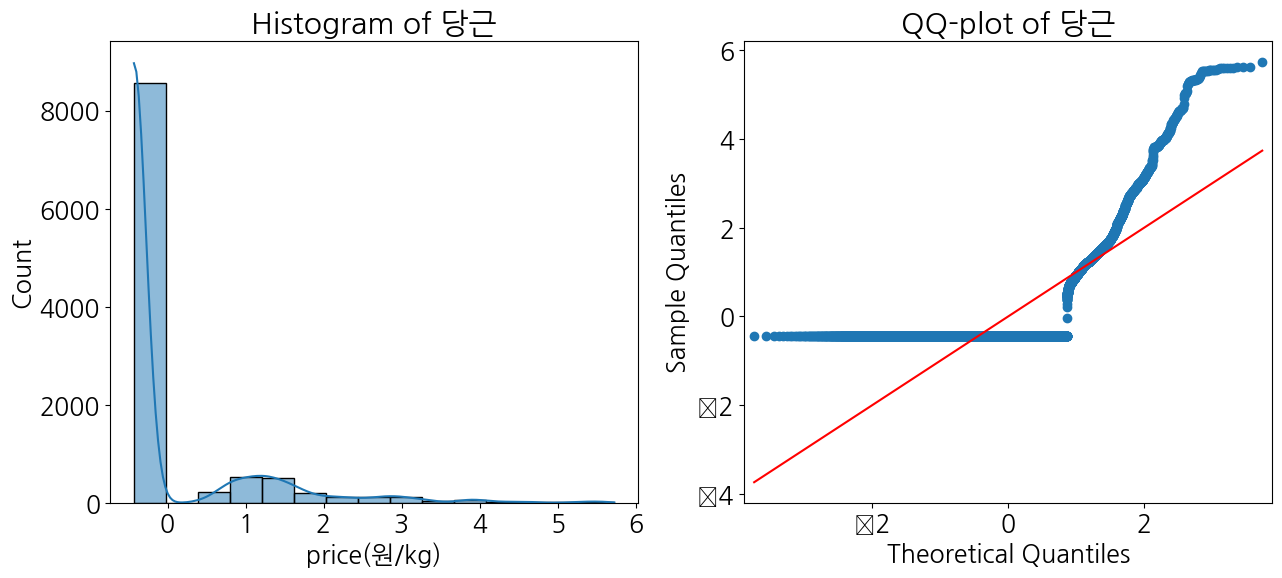

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 양배추: p-value = 0.0


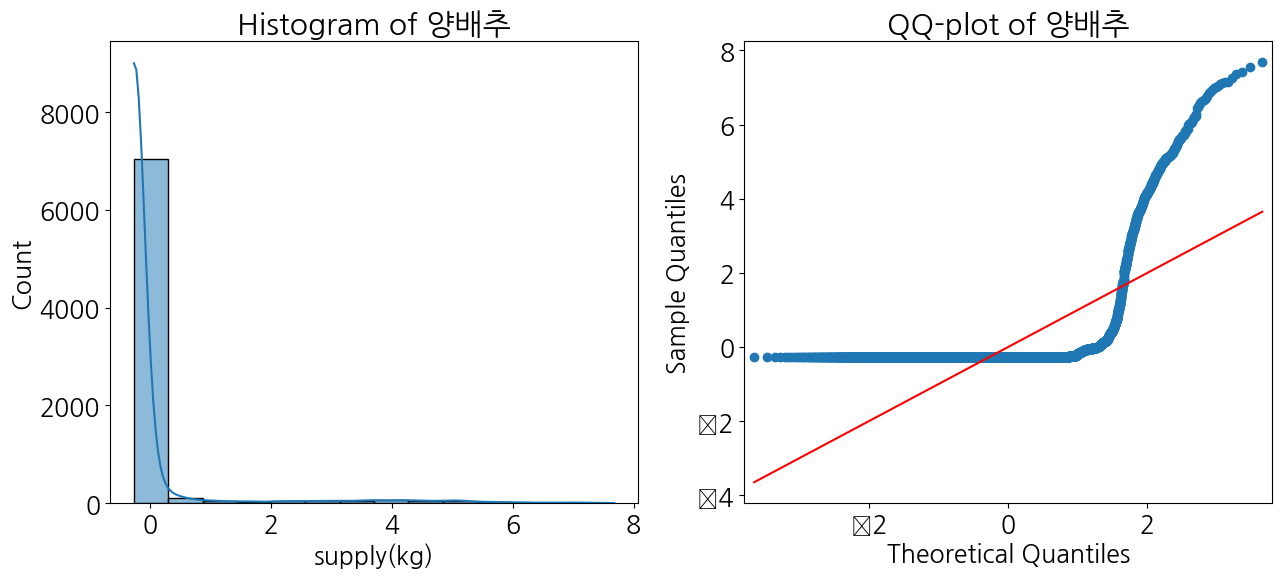

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Shapiro-Wilk test for 양배추: p-value = 0.0


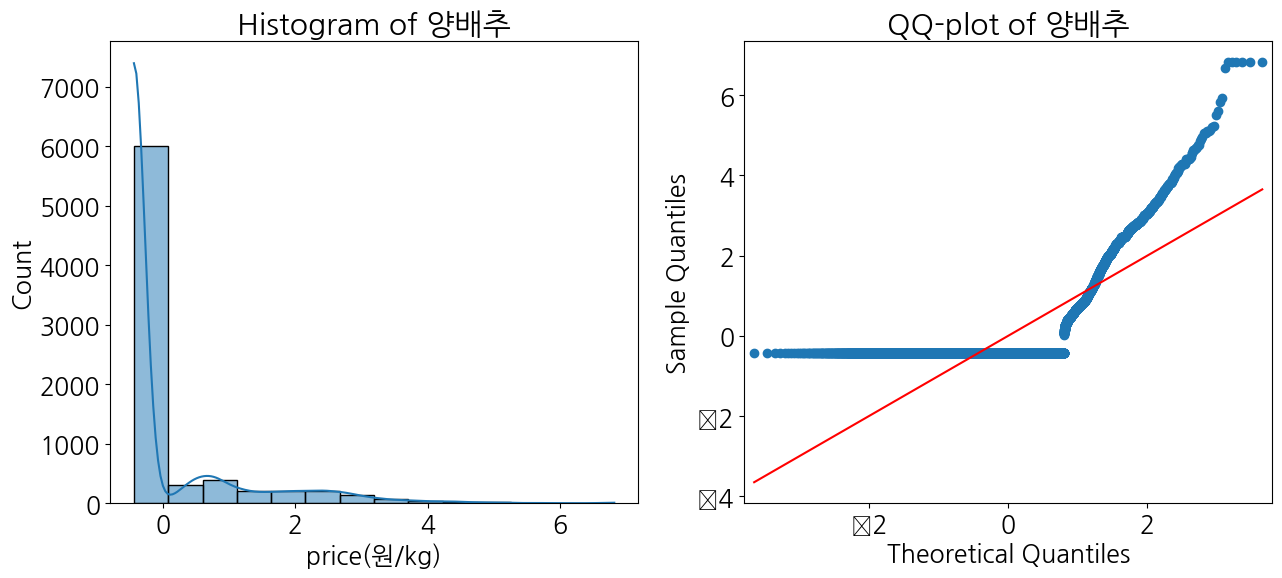

In [ ]:
data_list = [(tg, '감귤'), (bc, '브로콜리'), (rd, '무'), (cr, '당근'), (cb, '양배추')]

def plot_histogram_qq_by_item(data_df, item_name):
    # 두 개의 서브플롯을 생성
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # 히스토그램 그리기
    sns.histplot(data_df, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {item_name}')

    # QQ 플롯 그리기
    sm.qqplot(data_df, line='s', ax=ax[1])
    ax[1].set_title(f'QQ-plot of {item_name}')

    # Shapiro-Wilk test
    sw_result = shapiro(data_df)
    print(f"Shapiro-Wilk test for {item_name}: p-value = {sw_result.pvalue}")

    # 플롯 보여주기
    plt.show()

# 주어진 리스트에 있는 각 데이터프레임과 품목 이름으로 히스토그램과 QQ 플롯 그리기
for data_df, item_name in data_list:
    plot_histogram_qq_by_item(data_df['supply(kg)'], item_name)
    plot_histogram_qq_by_item(data_df['price(원/kg)'], item_name)

In [ ]:
encode_cols = ['item', 'corporation', 'location']

encoders = {}

for col in encode_cols:
    encoder = LabelEncoder()
    mg_df[col] = encoder.fit_transform(mg_df[col])
    encoders[col] = encoder

In [ ]:
# 주어진 딕셔너리
encoder_dict = {'item': LabelEncoder(),
                'corporation': LabelEncoder(),
                'location': LabelEncoder()}

# 딕셔너리의 키(Key)와 값(Value) 출력
for feature, encoder in encoder_dict.items():
    print(f"LabelEncoder for '{feature}': {encoder}")

LabelEncoder for 'item': LabelEncoder()
LabelEncoder for 'corporation': LabelEncoder()
LabelEncoder for 'location': LabelEncoder()


In [ ]:
encoded_item_values = [0,1,2,3,4]  # 예시로 인코딩된 'item' 열 값
decoded_item_values = encoders['item'].inverse_transform(encoded_item_values)  # 원래 값으로 변환

# 결과 출력
print(decoded_item_values)

['감귤' '당근' '무' '브로콜리' '양배추']


In [ ]:
mg_df = mg_df.rename(columns={
    '수출 중량': 'export_weight',
    '수출 금액': 'export_amount',
    '수입 중량': 'import_weight',
    '수입 금액': 'import_amount',
    '무역수지': 'trade_balance',
    'price(원/kg)': 'price',
    'supply(kg)' : 'supply'
})

In [ ]:
mg_df.head()

,item,corporation,location,supply,price,export_weight,export_amount,import_weight,import_amount,trade_balance
0,0,0,0,0.0,0.0,58368,172,0,0,172
1,0,0,0,0.0,0.0,58368,172,0,0,172
2,0,0,0,60601.0,1728.0,58368,172,0,0,172
3,0,0,0,25000.0,1408.0,58368,172,0,0,172
4,0,0,0,32352.0,1250.0,58368,172,0,0,172


In [ ]:
mg_df.columns

Index(['item', 'corporation', 'location', 'supply', 'price', 'export_weight',
       'export_amount', 'import_weight', 'import_amount', 'trade_balance'],
      dtype='object')

In [ ]:
dependent_vars = ['price', 'supply']

independent_vars = ['item', 'corporation', 'location', 'export_weight', 'export_amount', 'import_weight', 'import_amount',
       'trade_balance']

In [ ]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(mg_df['supply'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"P-value: {shapiro_p_value}")

Shapiro-Wilk Test Statistic: 0.24218326807022095
P-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(mg_df['price'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"P-value: {shapiro_p_value}")

Shapiro-Wilk Test Statistic: 0.6793739795684814
P-value: 0.0


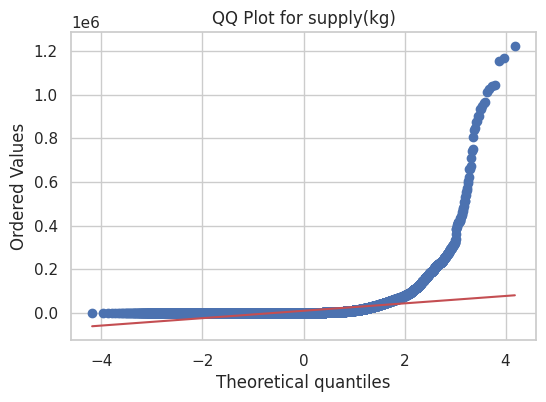

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
stats.probplot(mg_df['supply'], dist="norm", plot=plt)
plt.title("QQ Plot for supply(kg)")
plt.show()

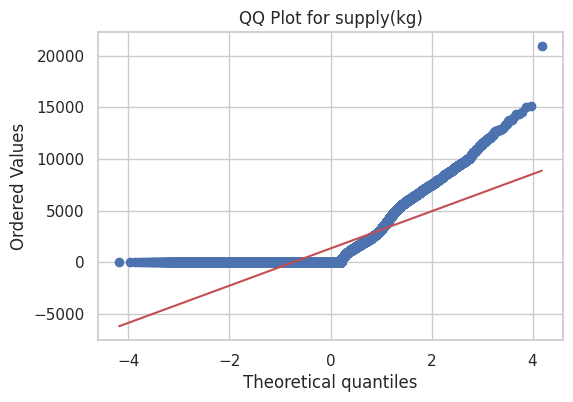

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
stats.probplot(mg_df['price'], dist="norm", plot=plt)
plt.title("QQ Plot for supply(kg)")
plt.show()

In [ ]:
# MANOVA
dependent_vars = ['price', 'supply']

independent_vars = ['item', 'corporation', 'location', 'export_weight', 'export_amount', 'import_weight', 'import_amount',
       'trade_balance']

formula = f'{" + ".join(dependent_vars)} ~ {" + ".join(independent_vars)}'
maov = MANOVA.from_formula(formula, data=mg_df)
print(maov.mv_test())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.6179 2.0000 48550.0000 15009.6867 0.0000
         Pillai's trace 0.3821 2.0000 48550.0000 15009.6867 0.0000
 Hotelling-Lawley trace 0.6183 2.0000 48550.0000 15009.6867 0.0000
    Roy's greatest root 0.6183 2.0000 48550.0000 15009.6867 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
           item          Value  Num DF   Den DF    F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda 0.7516 2.0000 48550.0000 8021.9457 0.0000
          Pillai

연구 가설:
지역별 가격 차이:

H0: 지역에 따른 농산물 가격의 차이는 없을 것이다.
H1: 지역에 따른 농산물 가격의 차이는 있을 것이다.
지역별 공급량 차이:

H0: 지역에 따른 농산물 공급량의 차이는 없을 것이다.
H1: 지역에 따른 농산물 공급량의 차이는 있을 것이다.
시간에 따른 가격 변화:

H0: 시간에 따른 농산물 가격의 변화는 없을 것이다.
H1: 시간에 따른 농산물 가격의 변화는 있을 것이다.
시간에 따른 공급량 변화:

H0: 시간에 따른 농산물 공급량의 변화는 없을 것이다.
H1: 시간에 따른 농산물 공급량의 변화는 있을 것이다.
수출입 상황에 따른 가격 변화:

H0: 수출입 상황에 따른 농산물 가격의 변화는 없을 것이다.
H1: 수출입 상황에 따른 농산물 가격의 변화는 있을 것이다.
수출입 상황에 따른 공급량 변화:

H0: 수출입 상황에 따른 농산물 공급량의 변화는 없을 것이다.
H1: 수출입 상황에 따른 농산물 공급량의 변화는 있을 것이다.

제공된 출력은 다변량 분산분석(MANOVA)의 결과입니다. MANOVA는 여러 종속변수가 하나 이상의 독립변수에 의해 동시에 어떻게 영향을 받는지를 검정하는 통계적 방법입니다. 결과에는 Wilks' lambda, Pillai's trace, Hotelling-Lawley trace, Roy's greatest root 등 여러 통계량이 포함되어 있으며, 이는 독립변수가 종속변수들에 대해 유의미한 영향을 미치는지 여부를 나타냅니다. 각 통계량은 MANOVA의 다양한 검정 방법을 대표합니다.

여기에서 각 통계량 및 F 값, p 값 등의 해석을 제공하겠습니다:

공통적인 요소들:
Wilks' Lambda: 종속 변수들의 변동 중 독립 변수들과 관련 없는 변동의 비율을 나타냅니다. 1에 가까울수록 그룹 간 차이가 적음을 의미합니다. 값이 작을수록 (0에 가까울수록) 그룹 간 차이가 크다는 것을 의미합니다.
Pillai's Trace: 종속 변수들의 변동 중 독립 변수들과 관련 있는 변동의 비율을 나타냅니다.
Hotelling-Lawley Trace: 효과 크기(effect size)를 나타내는데 사용됩니다. 값이 클수록 독립변수의 효과가 크다는 것을 의미합니다.
Roy's Greatest Root: 가장 큰 고유값을 기반으로 한 통계량입니다. 하나의 가장 강력한 종속변수의 효과를 나타냅니다.
각 독립변수에 대한 해석:
Intercept
모든 통계량의 p-값이 0.0000 입니다. 이는 모델의 전체적인 효과가 매우 유의미하다는 것을 의미합니다.
각 독립변수별 (예: item, corporation, location 등):
독립변수 이름: 각 독립변수에 대한 MANOVA 결과입니다. 각 독립변수는 모델 내에서 종속 변수들에 대한 영향을 개별적으로 나타냅니다.
F Value: 각 독립변수에 대한 F 통계량입니다. F 통계량이 클수록 해당 독립변수가 종속변수에 대해 더 유의미한 영향을 미치고 있다는 것을 의미합니다.
Pr > F (p-value): 독립변수가 종속변수에 미치는 영향이 통계적으로 유의미한지를 나타내는 p-값입니다. 일반적으로 0.05 또는 0.01 이하일 때 통계적으로 유의미하다고 판단합니다.
해석:
item, corporation, location 등: 모든 독립변수들의 p-값이 매우 작습니다 (0.0000). 이는 이러한 독립변수들이 종속변수인 'price(원/kg)'과 'supply(kg)'에 대해 통계적으로 유의미한 영향을 미친다는 것을 의미합니다.
특히, Wilks' Lambda 값이 상대적으로 작은 독립변수들은 더 큰 효과를 종속변수에 미칠 가능성이 있습니다. 예를 들어, 'item'의 Wilks' Lambda가 0.7516으로 다른 변수들에 비해 상대적으로 낮으므로, 'item'은 종속변수들에 상대적으로 큰 영향을 미치는 것으로 해석할 수 있습니다.
이 결과는 독립변수들이 종속변수들의 변동성을 설명하는 데 매우 유의미하며, 특히 'item', 'corporation', 'location' 등 특정 변수들이 더 큰 영향을 미칠 수 있음을 시사합니다. 그러나 이러한 통계적 유의성은 실제 데이터의 맥락과 결합하여 해석되어야 하며, 유의미한 결과가 반드시 실용적인 중요성을 의미하지는 않을 수 있습니다. 따라서, 이러한 결과를 바탕으로 추가적인 분석, 데이터 탐색 또는 전문가의 의견을 통해 심층적인 인사이트를 도출해야 합니다.

# 사후검정

사후 검정(Post-hoc tests)은 MANOVA 이후 특정 그룹 간의 차이를 더 자세히 조사하기 위해 수행됩니다. MANOVA 결과가 통계적으로 유의미하다면, 어떤 그룹 간에 차이가 있는지, 그리고 그 차이가 어떤 방향인지를 파악하기 위해 사후 검정을 수행할 수 있습니다.


<ipython-input-32-b366c8c2c5bc>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=mg_df['price'], shade= True)


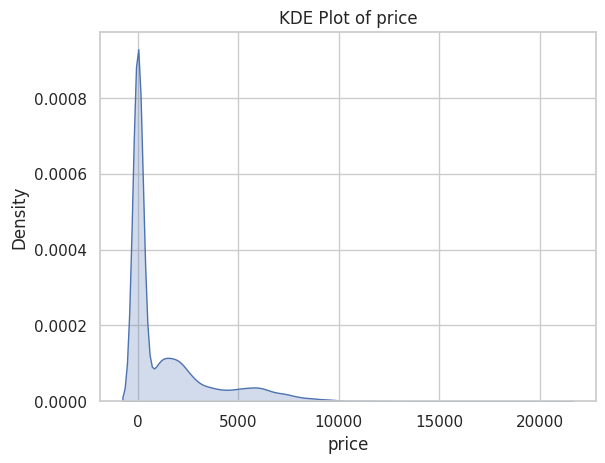

In [ ]:
sns.kdeplot(data=mg_df['price'], shade= True)
plt.title("KDE Plot of price")
plt.show()

<ipython-input-33-d03d7ca6ce5e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=mg_df['supply'], shade= True)


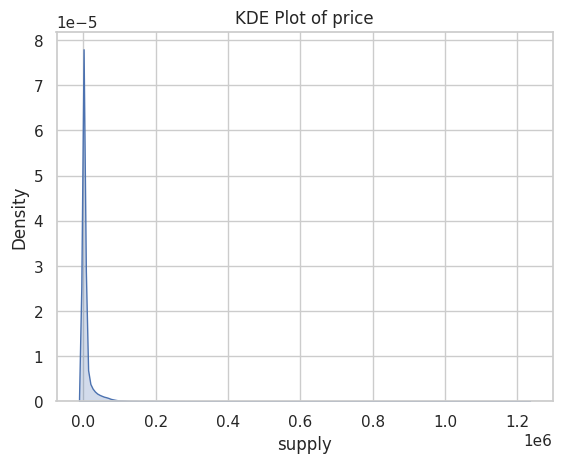

In [ ]:
sns.kdeplot(data=mg_df['supply'], shade= True)
plt.title("KDE Plot of price")
plt.show()

In [ ]:
mg_df

,item,corporation,location,supply,price,export_weight,export_amount,import_weight,import_amount,trade_balance
0,0,0,0,0.0,0.0,58368,172,0,0,172
1,0,0,0,0.0,0.0,58368,172,0,0,172
2,0,0,0,60601.0,1728.0,58368,172,0,0,172
3,0,0,0,25000.0,1408.0,58368,172,0,0,172
4,0,0,0,32352.0,1250.0,58368,172,0,0,172
...,...,...,...,...,...,...,...,...,...,...
48555,3,4,1,2104.0,2025.0,24,0,332640,352,-352
48556,3,4,1,1032.0,2353.0,24,0,332640,352,-352
48557,3,4,1,0.0,0.0,24,0,332640,352,-352
48558,3,4,1,2200.0,2488.0,24,0,332640,352,-352


In [ ]:
# 역변환 함수 정의
def reverse_label_encoding(encoded_value, encoder):
    return encoder.inverse_transform([encoded_value])[0]

# 각 열에 대한 역변환 수행
for col in encode_cols:
    mg_df[col] = mg_df[col].apply(lambda x: reverse_label_encoding(x, encoders[col]))

# 역변환된 데이터 확인
print(mg_df)

       item corporation location   supply   price  export_weight  \
0        감귤           A        J      0.0     0.0          58368   
1        감귤           A        J      0.0     0.0          58368   
2        감귤           A        J  60601.0  1728.0          58368   
3        감귤           A        J  25000.0  1408.0          58368   
4        감귤           A        J  32352.0  1250.0          58368   
...     ...         ...      ...      ...     ...            ...   
48555  브로콜리           E        S   2104.0  2025.0             24   
48556  브로콜리           E        S   1032.0  2353.0             24   
48557  브로콜리           E        S      0.0     0.0             24   
48558  브로콜리           E        S   2200.0  2488.0             24   
48559  브로콜리           E        S   1024.0  3232.0             24   

       export_amount  import_weight  import_amount  trade_balance  
0                172              0              0            172  
1                172              0            

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

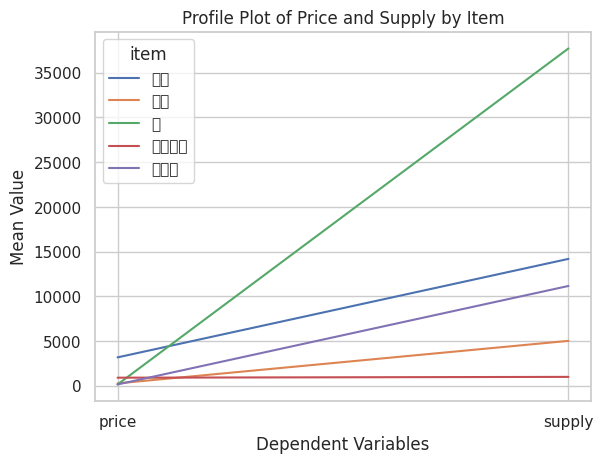

In [ ]:

# 그룹 변수 설정 ('item'을 그룹 변수로 가정)
group_variable = 'item'

# 종속 변수 이름 설정
dependent_vars = ['price', 'supply']

# Profile Plot 생성
for name, group in mg_df.groupby(group_variable):
    # 평균 계산 및 플롯
    means = group[dependent_vars].mean()
    plt.plot(dependent_vars, means, label=name)

plt.title('Profile Plot of Price and Supply by Item')
plt.xlabel('Dependent Variables')
plt.ylabel('Mean Value')
plt.legend(title=group_variable)
plt.show()


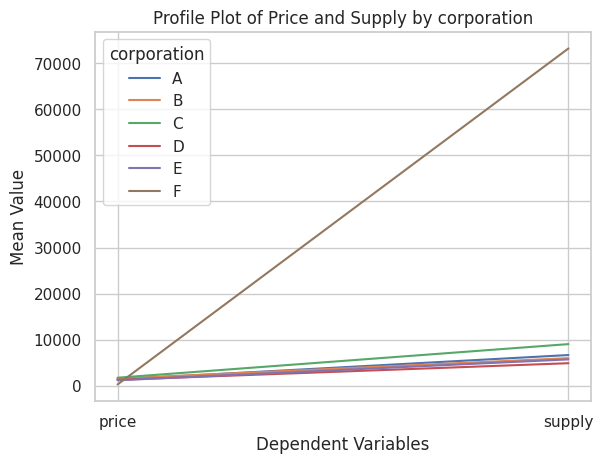

In [ ]:

# 그룹 변수 설정 ('item'을 그룹 변수로 가정)
group_variable = 'corporation'

# 종속 변수 이름 설정
dependent_vars = ['price', 'supply']

# Profile Plot 생성
for name, group in mg_df.groupby(group_variable):
    # 평균 계산 및 플롯
    means = group[dependent_vars].mean()
    plt.plot(dependent_vars, means, label=name)

plt.title('Profile Plot of Price and Supply by corporation')
plt.xlabel('Dependent Variables')
plt.ylabel('Mean Value')
plt.legend(title=group_variable)
plt.show()

<ipython-input-38-a9c0e66c87d9>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = mg_df.groupby('corporation').mean()


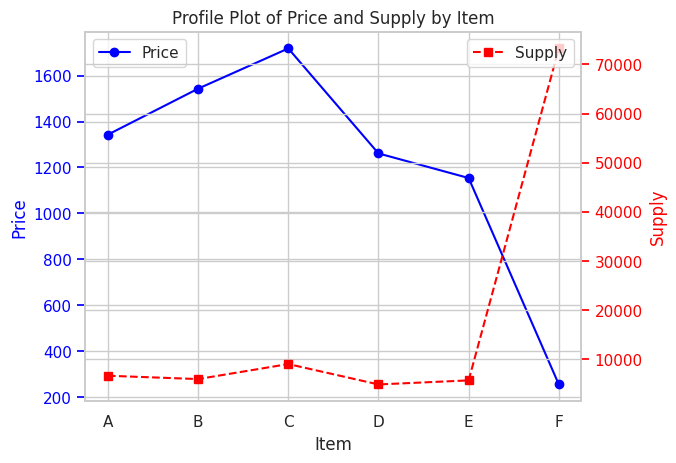

In [ ]:
fig, ax1 = plt.subplots()

# 'item'을 기준으로 그룹화하고 각 그룹의 평균 계산
grouped = mg_df.groupby('corporation').mean()

# 'item'을 x축 데이터로 사용
items = grouped.index

# 'price'를 첫 번째 y축에 플롯
ax1.plot(items, grouped['price'], 'o-', color='blue', label='Price')
ax1.set_xlabel('Item')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 'supply'를 두 번째 y축에 플롯
ax2.plot(items, grouped['supply'], 's--', color='red', label='Supply')
ax2.set_ylabel('Supply', color='red')
ax2.tick_params(axis='y', colors='red')

# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 타이틀 설정
plt.title('Profile Plot of Price and Supply by Item')

# 그래프 표시
plt.show()

In [ ]:
mc_price = MultiComparison(mg_df['price'], mg_df['corporation'])
result_price = mc_price.tukeyhsd()
print("Price에 대한 사후 검정 결과:")
print(result_price)

Price에 대한 사후 검정 결과:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     A      B    200.176    0.0   108.1656   292.1864   True
     A      C   375.4548    0.0   284.0761   466.8336   True
     A      D   -81.9063 0.0752  -168.3529     4.5403  False
     A      E  -189.1536    0.0  -272.3304  -105.9768   True
     A      F -1088.5796    0.0 -1249.3346  -927.8246   True
     B      C   175.2788    0.0    75.7921   274.7655   True
     B      D  -282.0823    0.0  -377.0589  -187.1058   True
     B      E  -389.3296    0.0    -481.34  -297.3193   True
     B      F -1288.7556    0.0  -1454.254 -1123.2572   True
     C      D  -457.3611    0.0  -551.7259  -362.9963   True
     C      E  -564.6084    0.0  -655.9872  -473.2297   True
     C      F -1464.0344    0.0 -1629.1825 -1298.8864   True
     D      E  -107.2473 0.0055  -193.6939   -20.8007   True
    

In [ ]:
mc_supply = MultiComparison(mg_df['supply'], mg_df['corporation'])
result_supply = mc_supply.tukeyhsd()
print("Supply에 대한 사후 검정 결과:")
print(result_supply)


Supply에 대한 사후 검정 결과:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     A      B  -678.0177 0.7209 -2048.1284   692.0929  False
     A      C  2375.0284    0.0  1014.3235  3735.7334   True
     A      D -1773.4051 0.0012 -3060.6666  -486.1436   True
     A      E  -945.8032 0.2489 -2184.3744   292.7679  False
     A      F 66598.7188    0.0 64204.9436 68992.4941   True
     B      C  3053.0462    0.0  1571.6068  4534.4856   True
     B      D -1095.3874 0.2343  -2509.667   318.8923  False
     B      E  -267.7855 0.9937 -1637.8962  1102.3252  False
     B      F 67276.7366    0.0  64812.329 69741.1441   True
     C      D -4148.4335    0.0 -5553.6031 -2743.2639   True
     C      E -3320.8317    0.0 -4681.5366 -1960.1267   True
     C      F 64223.6904    0.0 61764.4996 66682.8812   True
     D      E   827.6019 0.4449  -459.6596  2114.8634  False
   

<ipython-input-41-fee8a1277e82>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = mg_df.groupby('item').mean()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL S

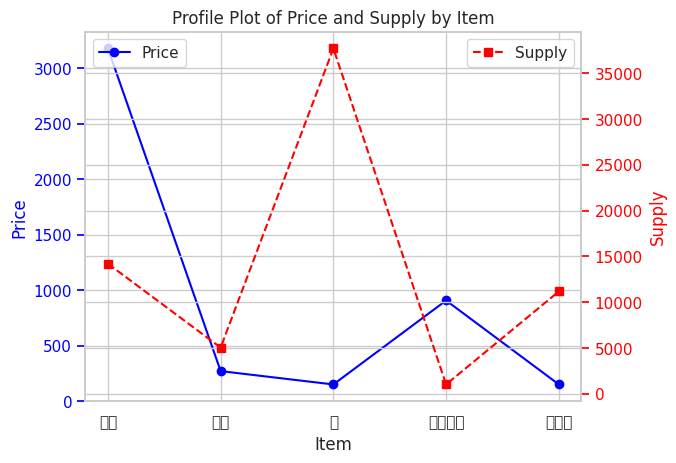

In [ ]:
fig, ax1 = plt.subplots()

# 'item'을 기준으로 그룹화하고 각 그룹의 평균 계산
grouped = mg_df.groupby('item').mean()

# 'item'을 x축 데이터로 사용
items = grouped.index

# 'price'를 첫 번째 y축에 플롯
ax1.plot(items, grouped['price'], 'o-', color='blue', label='Price')
ax1.set_xlabel('Item')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 'supply'를 두 번째 y축에 플롯
ax2.plot(items, grouped['supply'], 's--', color='red', label='Supply')
ax2.set_ylabel('Supply', color='red')
ax2.tick_params(axis='y', colors='red')

# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 타이틀 설정
plt.title('Profile Plot of Price and Supply by Item')

# 그래프 표시
plt.show()

In [ ]:
mc_price = MultiComparison(mg_df['price'], mg_df['item'])
result_price = mc_price.tukeyhsd()
print("Price에 대한 사후 검정 결과:")
print(result_price)

Price에 대한 사후 검정 결과:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
    감귤     당근 -2905.5505    0.0 -2966.6753 -2844.4257   True
    감귤      무 -3025.6693    0.0 -3159.0022 -2892.3364   True
    감귤   브로콜리 -2269.6884    0.0 -2326.6783 -2212.6986   True
    감귤    양배추 -3025.5498    0.0 -3093.4862 -2957.6134   True
    당근      무  -120.1188 0.1117  -255.9018    15.6641  False
    당근   브로콜리   635.8621    0.0   573.3546   698.3695   True
    당근    양배추  -119.9993 0.0001  -192.6264   -47.3722   True
     무   브로콜리   755.9809    0.0   622.0085   889.9533   True
     무    양배추     0.1195    1.0  -138.8629   139.1019  False
  브로콜리    양배추  -755.8614    0.0  -825.0444  -686.6783   True
------------------------------------------------------------


In [ ]:
mc_supply = MultiComparison(mg_df['supply'], mg_df['item'])
result_supply = mc_supply.tukeyhsd()
print("Supply에 대한 사후 검정 결과:")
print(result_supply)


Supply에 대한 사후 검정 결과:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
    감귤     당근  -9163.0688   0.0 -10325.6174  -8000.5201   True
    감귤      무  23524.8541   0.0  20988.9601  26060.7481   True
    감귤   브로콜리 -13191.0966   0.0 -14275.0016 -12107.1916   True
    감귤    양배추  -3026.8876   0.0  -4318.9882  -1734.7871   True
    당근      무  32687.9228   0.0  30105.4314  35270.4143   True
    당근   브로콜리  -4028.0278   0.0  -5216.8733  -2839.1824   True
    당근    양배추   6136.1811   0.0   4754.8675   7517.4947   True
     무   브로콜리 -36715.9507   0.0 -39264.0073  -34167.894   True
     무    양배추 -26551.7417   0.0 -29195.0855 -23908.3979   True
  브로콜리    양배추   10164.209   0.0   8848.3982  11480.0198   True
--------------------------------------------------------------


tukeyhsd(): Tukey의 정직유의차 검정을 수행하는 메서드입니다. 이 검정은 각 그룹 간의 평균 차이가 통계적으로 유의한지를 판단합니다.


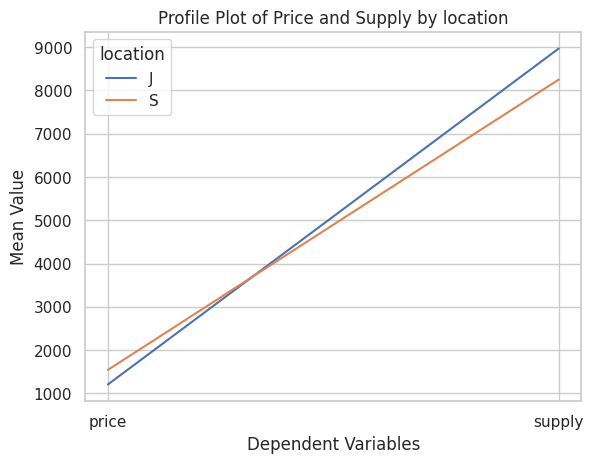

In [ ]:

# 그룹 변수 설정 ('item'을 그룹 변수로 가정)
group_variable = 'location'

# 종속 변수 이름 설정
dependent_vars = ['price', 'supply']

# Profile Plot 생성
for name, group in mg_df.groupby(group_variable):
    # 평균 계산 및 플롯
    means = group[dependent_vars].mean()
    plt.plot(dependent_vars, means, label=name)

plt.title('Profile Plot of Price and Supply by location')
plt.xlabel('Dependent Variables')
plt.ylabel('Mean Value')
plt.legend(title=group_variable)
plt.show()

In [ ]:
mc_price = MultiComparison(mg_df['price'], mg_df['location'])
result_price = mc_price.tukeyhsd()
print("Price에 대한 사후 검정 결과:")
print(result_price)

Price에 대한 사후 검정 결과:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     J      S 337.0534   0.0 297.3699 376.7369   True
-----------------------------------------------------


In [ ]:
mc_supply = MultiComparison(mg_df['supply'], mg_df['location'])
result_supply = mc_supply.tukeyhsd()
print("Supply에 대한 사후 검정 결과:")
print(result_supply)


Supply에 대한 사후 검정 결과:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     J      S -717.184 0.0255 -1346.5359 -87.8322   True
--------------------------------------------------------


<ipython-input-47-8d81e64681be>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = mg_df.groupby('location').mean()


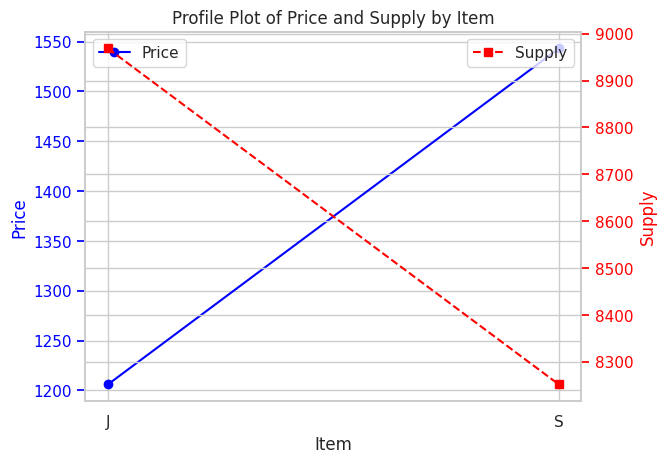

In [ ]:
fig, ax1 = plt.subplots()

# 'item'을 기준으로 그룹화하고 각 그룹의 평균 계산
grouped = mg_df.groupby('location').mean()

# 'item'을 x축 데이터로 사용
items = grouped.index

# 'price'를 첫 번째 y축에 플롯
ax1.plot(items, grouped['price'], 'o-', color='blue', label='Price')
ax1.set_xlabel('Item')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', colors='blue')

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 'supply'를 두 번째 y축에 플롯
ax2.plot(items, grouped['supply'], 's--', color='red', label='Supply')
ax2.set_ylabel('Supply', color='red')
ax2.tick_params(axis='y', colors='red')

# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 타이틀 설정
plt.title('Profile Plot of Price and Supply by Item')

# 그래프 표시
plt.show()

1. Profile Plots:
정의: 각 그룹에 대한 종속 변수들의 평균을 선으로 연결한 그래프입니다.
사용법: 각 선은 그룹별로 종속 변수들의 평균 프로파일을 나타냅니다. 이는 그룹 간에 종속 변수의 패턴이 어떻게 다른지 비교하는 데 유용합니다.

4. Canonical Discriminant Analysis:
정의: MANOVA 후에 수행할 수 있는 방법으로, 종속 변수들을 최대한 구분하는 새로운 축(정준 변수)을 찾아 데이터를 저차원 공간에 투영합니다.
사용법: 이는 종속 변수들의 다변량 패턴을 이해하고, 그룹 간 차이를 시각화하는 데 도움이 됩니다. 2차원 또는 3차원 플롯으로 나타낼 수 있습니다.

In [ ]:
mg_df.columns

Index(['item', 'corporation', 'location', 'supply', 'price', 'export_weight',
       'export_amount', 'import_weight', 'import_amount', 'trade_balance'],
      dtype='object')

In [ ]:
scale_cols = ['supply', 'price', 'export_weight','export_amount', 'import_weight', 'import_amount', 'trade_balance']
encode_cols = ['item', 'corporation', 'location']

mg_df = pd.get_dummies(mg_df, columns=encode_cols)

scaler = StandardScaler()
mg_df[scale_cols] = scaler.fit_transform(mg_df[scale_cols])

In [ ]:
mg_df

,supply,price,export_weight,export_amount,import_weight,import_amount,trade_balance,item_감귤,item_당근,item_무,item_브로콜리,item_양배추,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S
0,-0.251698,-0.612822,-0.236554,-0.009504,-0.646902,-0.765890,0.666830,1,0,0,0,0,1,0,0,0,0,0,1,0
1,-0.251698,-0.612822,-0.236554,-0.009504,-0.646902,-0.765890,0.666830,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1.503823,0.178840,-0.236554,-0.009504,-0.646902,-0.765890,0.666830,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0.472515,0.032236,-0.236554,-0.009504,-0.646902,-0.765890,0.666830,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0.685491,-0.040150,-0.236554,-0.009504,-0.646902,-0.765890,0.666830,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48555,-0.190749,0.314907,-0.319337,-0.347245,-0.549794,-0.512945,0.337501,0,0,0,1,0,0,0,0,0,1,0,0,1
48556,-0.221803,0.465176,-0.319337,-0.347245,-0.549794,-0.512945,0.337501,0,0,0,1,0,0,0,0,0,1,0,0,1
48557,-0.251698,-0.612822,-0.319337,-0.347245,-0.549794,-0.512945,0.337501,0,0,0,1,0,0,0,0,0,1,0,0,1
48558,-0.187968,0.527025,-0.319337,-0.347245,-0.549794,-0.512945,0.337501,0,0,0,1,0,0,0,0,0,1,0,0,1


In [ ]:
len(mg_df.columns)

20

In [ ]:
X = mg_df.drop(['supply', 'price'], axis=1)
y = mg_df[['supply', 'price']]


In [ ]:
pca = PCA(n_components = 18)
pca_array = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_array, index = X.index, columns=[f"pca{num+1}" for num in range(X.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18
0,1.07283,-0.669772,-0.539337,-0.541785,0.37952,-0.335557,-0.679707,-0.04274,-0.513021,0.056523,-0.016781,-0.002326,0.057775,-0.001179,-0.000005,-1.883885e-14,-1.632349e-14,5.743569e-15
1,1.07283,-0.669772,-0.539337,-0.541785,0.37952,-0.335557,-0.679707,-0.04274,-0.513021,0.056523,-0.016781,-0.002326,0.057775,-0.001179,-0.000005,-4.878999e-14,3.985218e-15,-2.953810e-15
2,1.07283,-0.669772,-0.539337,-0.541785,0.37952,-0.335557,-0.679707,-0.04274,-0.513021,0.056523,-0.016781,-0.002326,0.057775,-0.001179,-0.000005,7.131647e-14,-1.753328e-14,2.864678e-15
3,1.07283,-0.669772,-0.539337,-0.541785,0.37952,-0.335557,-0.679707,-0.04274,-0.513021,0.056523,-0.016781,-0.002326,0.057775,-0.001179,-0.000005,-1.278753e-14,1.546553e-14,8.670018e-15
4,1.07283,-0.669772,-0.539337,-0.541785,0.37952,-0.335557,-0.679707,-0.04274,-0.513021,0.056523,-0.016781,-0.002326,0.057775,-0.001179,-0.000005,-7.541367e-15,-1.266222e-15,-3.014235e-15


In [ ]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)': pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f"pca{num+1}" for num in range(X.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,3.458925e+00,4.917933e-01,0.491793
pca2,1.644793e+00,2.338582e-01,0.725652
pca3,4.826051e-01,6.861727e-02,0.794269
pca4,3.078813e-01,4.377487e-02,0.838044
pca5,2.474072e-01,3.517660e-02,0.873220
pca6,2.180402e-01,3.100116e-02,0.904221
pca7,1.909984e-01,2.715634e-02,0.931378
pca8,1.585641e-01,2.254480e-02,0.953923
pca9,1.375715e-01,1.956005e-02,0.973483
pca10,5.447231e-02,7.744926e-03,0.981228


누적기여율 80% 이상이 넘어가지는 지점까지 주성분들을 기준으로 하여 적절한 주성분 개수를 설정

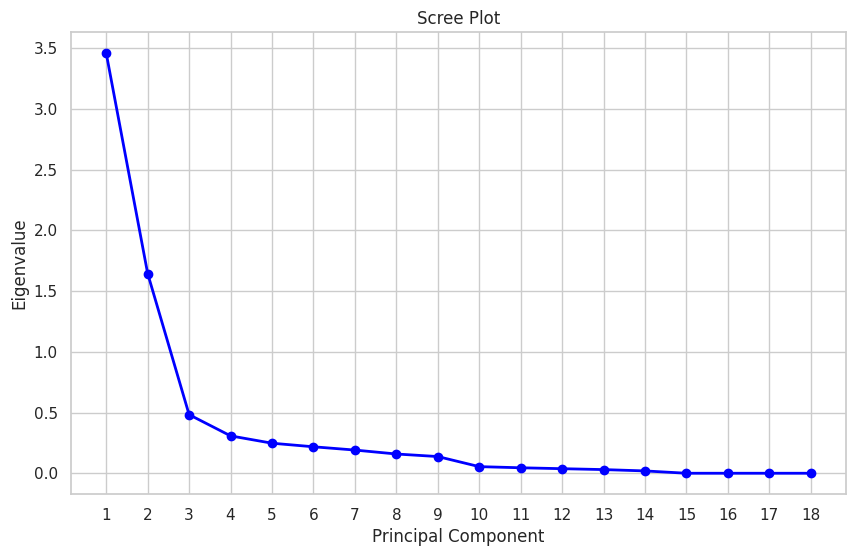

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# 주성분 번호를 x축에 표시
plt.xticks(np.arange(1, len(pca.explained_variance_) + 1))
plt.grid(True)
plt.show()

In [ ]:
first_principal_component = pca.components_[0]

# 변수명과 함께 출력
variable_names = X.columns  # 변수명 리스트
for variable, loading in zip(variable_names, first_principal_component):
    print(f"Variable: {variable}, Loading: {loading:.4f}")

Variable: export_weight, Loading: 0.3157
Variable: export_amount, Loading: 0.3297
Variable: import_weight, Loading: -0.4671
Variable: import_amount, Loading: -0.4868
Variable: trade_balance, Loading: 0.5313
Variable: item_감귤, Loading: 0.1281
Variable: item_당근, Loading: -0.1813
Variable: item_무, Loading: 0.0066
Variable: item_브로콜리, Loading: -0.0007
Variable: item_양배추, Loading: 0.0474
Variable: corporation_A, Loading: 0.0218
Variable: corporation_B, Loading: -0.0005
Variable: corporation_C, Loading: 0.0004
Variable: corporation_D, Loading: -0.0160
Variable: corporation_E, Loading: -0.0160
Variable: corporation_F, Loading: 0.0102
Variable: location_J, Loading: -0.0284
Variable: location_S, Loading: 0.0284


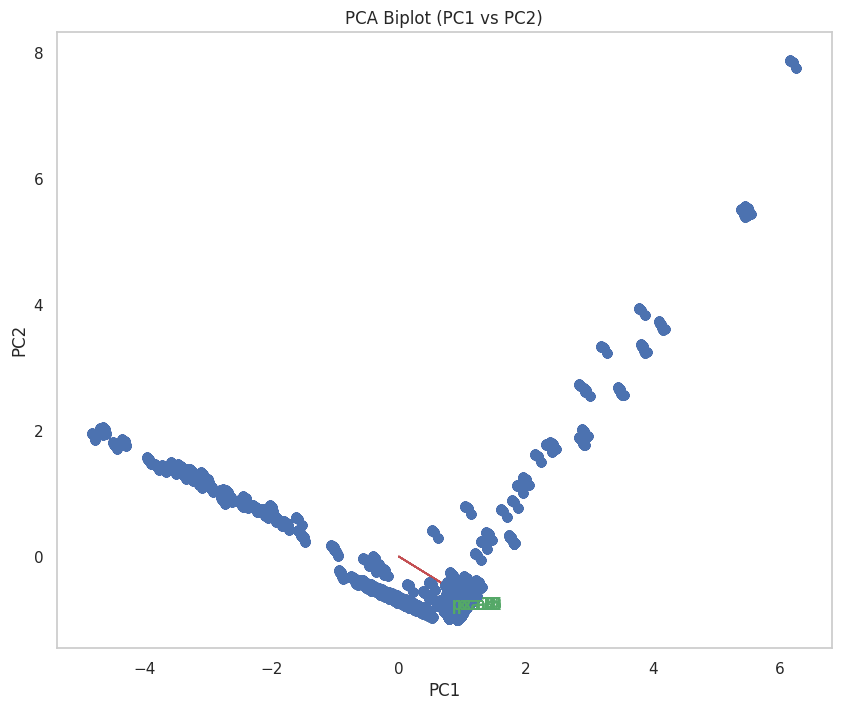

In [ ]:
# 주성분 벡터
pc1 = pca_df['pca1'].values
pc2 = pca_df['pca2'].values
pc3 = pca_df['pca3'].values

# 주성분 점수
pc_scores = pca_df[['pca1', 'pca2', 'pca3']].values

plt.figure(figsize=(10, 8))

# 주성분 벡터를 화살표로 표시
for i in range(len(pc1)):
    if i < len(pca_df.columns):
        plt.arrow(0, 0, pc1[i], pc2[i], color='r', alpha=0.5)
        plt.text(pc1[i]*1.15, pc2[i]*1.15, pca_df.columns[i], color='g', ha='center', va='center')

# 주성분 점수를 점으로 표시
plt.scatter(pc_scores[:, 0], pc_scores[:, 1], c='b', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA Biplot (PC1 vs PC2)')
plt.show()

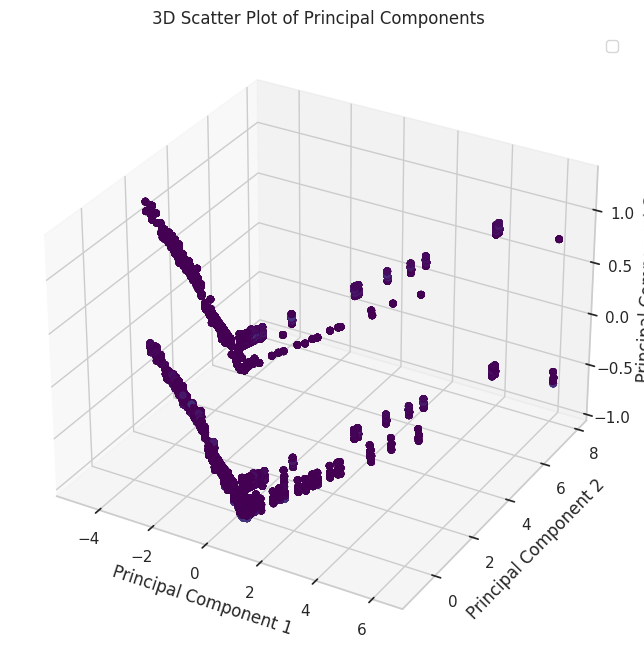

In [ ]:
principal_components = pca_df[['pca1', 'pca2', 'pca3']].values

# 종속 변수 데이터
y = mg_df[['supply']].values

# 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 주성분 1, 2, 3을 x, y, z 축으로 설정하여 scatter plot 그리기
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 그래프 제목과 레전드 추가
plt.title('3D Scatter Plot of Principal Components')
plt.legend()

plt.show()

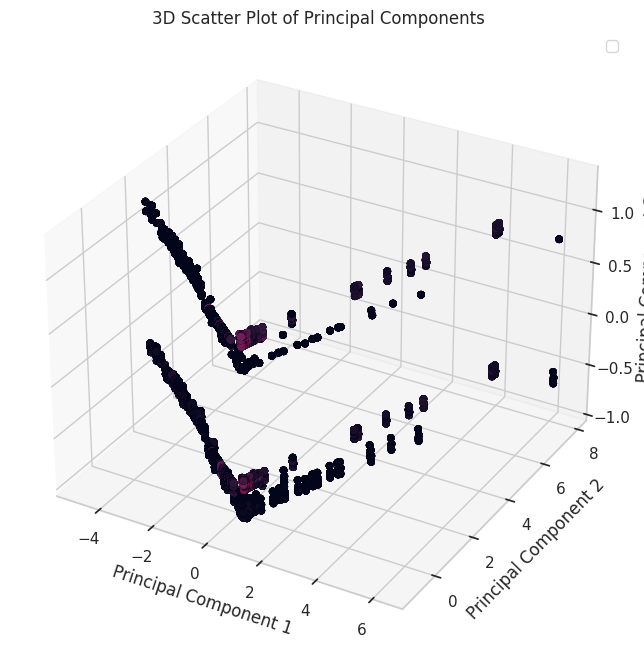

In [ ]:
principal_components = pca_df[['pca1', 'pca2', 'pca3']].values

# 종속 변수 데이터
y = mg_df[['price']].values

# 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 주성분 1, 2, 3을 x, y, z 축으로 설정하여 scatter plot 그리기
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=y, )
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 그래프 제목과 레전드 추가
plt.title('3D Scatter Plot of Principal Components')
plt.legend()

plt.show()

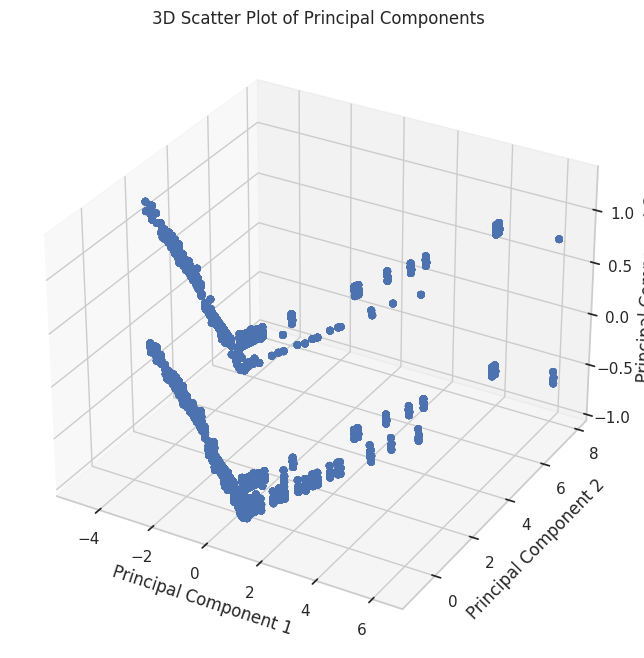

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the first three principal components
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2])

# Set the labels for each axis
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set the title of the plot
plt.title('3D Scatter Plot of Principal Components')

# Display the plot
plt.show()

In [ ]:
mg_df.columns

Index(['supply', 'price', 'export_weight', 'export_amount', 'import_weight',
       'import_amount', 'trade_balance', 'item_감귤', 'item_당근', 'item_무',
       'item_브로콜리', 'item_양배추', 'corporation_A', 'corporation_B',
       'corporation_C', 'corporation_D', 'corporation_E', 'corporation_F',
       'location_J', 'location_S'],
      dtype='object')

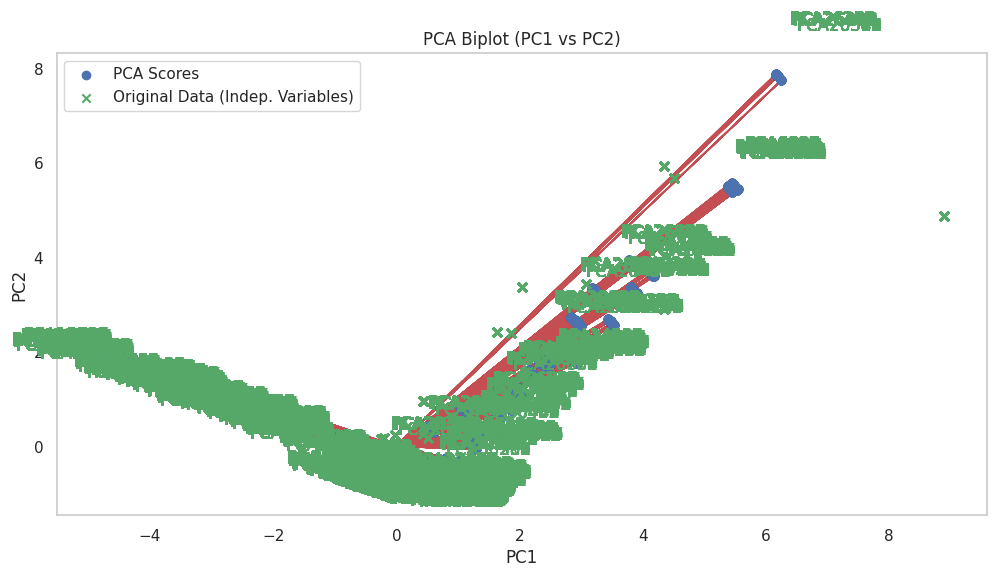

In [ ]:
# 주성분 벡터
pc1 = pca_df['pca1'].values
pc2 = pca_df['pca2'].values
pc3 = pca_df['pca3'].values  # 주성분 3 추가

# 주성분 점수
pc_scores = pca_df[['pca1', 'pca2', 'pca3']].values  # 주성분 3 추가

# 원래 데이터 (독립 변수)
X = mg_df.drop(['supply', 'price'], axis=1).values  # 'supply'와 'price'를 제외한 나머지 독립 변수

plt.figure(figsize=(12, 6))

# 주성분 벡터를 화살표로 표시
for i in range(len(pc1)):
    plt.arrow(0, 0, pc1[i], pc2[i], color='r', alpha=0.5)
    plt.text(pc1[i]*1.15, pc2[i]*1.15, f'PCA{i+1}', color='g', ha='center', va='center')

# 주성분 점수를 점으로 표시 (파란색 점)
plt.scatter(pc_scores[:, 0], pc_scores[:, 1], c='b', marker='o', label='PCA Scores')

# 원래 데이터를 점으로 표시 (녹색 점)
plt.scatter(X[:, 0], X[:, 1], c='g', marker='x', label='Original Data (Indep. Variables)')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA Biplot (PC1 vs PC2)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 주성분 벡터
pc1 = pca_df['pca1'].values
pc2 = pca_df['pca2'].values
pc3 = pca_df['pca3'].values

# 주성분 점수
pc_scores = pca_df[['pca1', 'pca2', 'pca3']].values

# 원래 데이터 (독립 변수)
X = mg_df.drop(['supply', 'price'], axis=1).values

plt.figure(figsize=(12, 6))

# 주성분 벡터를 화살표로 표시 (투명도 조절)
for i in range(len(pc1)):
    plt.arrow(0, 0, pc1[i], pc2[i], color='r', alpha=0.5, head_width=0.03)
    plt.text(pc1[i]*1.15, pc2[i]*1.15, f'PCA{i+1}', color='g', ha='center', va='center')

# 주성분 점수를 점으로 표시 (파란색 점, 라벨 표시)
for i in range(len(pc_scores)):
    plt.scatter(pc_scores[i, 0], pc_scores[i, 1], c='b', marker='o')
    plt.text(pc_scores[i, 0], pc_scores[i, 1], f'Data {i}', color='b', ha='right', va='bottom')

# 원래 데이터를 점으로 표시 (녹색 점, 라벨 표시)
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c='g', marker='x')
    plt.text(X[i, 0], X[i, 1], f'Original {i}', color='g', ha='right', va='bottom')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA Biplot (PC1 vs PC2)')
plt.show()
